In [113]:
# Basic information

HEIGHT, WIDTH = 640, 360
FPS = 30
MILLIMETERS_IN_PIXEL = 0.5
FILE = 'data.csv'

In [114]:
# Processing

import pandas as pd
data = pd.read_csv(FILE)
data.head(10)
data.drop('scorer', axis=1, inplace=True)
data.drop([0, 1], inplace=True)
data.reset_index(inplace=True, drop=True)

for i in range(2, len(data.columns), 2):
    data.drop(data.columns[i], axis=1, inplace=True)
    i -= 1

new_columns = []
for i in range(0, len(data.columns) // 2):
    new_columns.append(str(i + 1) + 'x')
    new_columns.append(str(i + 1) + 'y')

data.set_axis(new_columns, axis='columns', inplace = True)
data = data.apply(pd.to_numeric)
data *= MILLIMETERS_IN_PIXEL

data.head(10).round(4)

,1x,1y,2x,2y
0,60.7131,118.2024,48.1000,210.5509
1,60.8589,118.1292,49.0201,210.5409
2,60.9864,117.7537,49.0259,210.5371
3,60.8985,117.9540,48.9728,210.5464
4,60.6741,118.0640,49.0252,210.9060
5,60.5644,117.9375,48.9433,210.8879
6,60.6842,117.8938,48.8901,210.9362
7,60.7144,117.7894,48.8662,210.8544
8,60.7761,117.8921,48.8760,210.8989
9,60.8164,117.9081,48.8516,210.9266


In [115]:
# Ploting trajectories

import matplotlib.pyplot as plt
from itertools import cycle

def plot_trajectories(data, numbers):
    cycol = cycle('bgrcmk')
    ax = data.plot(x = str(numbers[0] + 1) + 'x', y = str(numbers[0] + 1) + 'y', c = next(cycol), style='b', legend = False, figsize = [4, 4 * HEIGHT / WIDTH])
    for i in range(1, len(numbers)):
        data.plot(x = str(numbers[i] + 1) + 'x', y = str(numbers[i] + 1) + 'y', c = next(cycol), ax = ax, legend = False)
    ax.set_xlabel('x, mm')
    ax.set_ylabel('y, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle=':', linewidth='0.5')
    ax.set_ylim(0, HEIGHT * MILLIMETERS_IN_PIXEL)
    ax.set_xlim(0, WIDTH * MILLIMETERS_IN_PIXEL)
    plt.show()

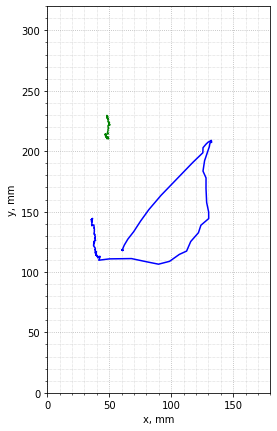

In [116]:
plot_trajectories(data, [i for i in range(0, len(data.columns) // 2)])

In [127]:
# Ploting velocities

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def plot_velocities(data, numbers):
    ax = plt.figure(figsize = (8, 5)).gca()
    for element in numbers:
        velocity = []
        for i in range(1, len(data.values)):
            dxcur = data.values[i][element * 2] - data.values[i - 1][element * 2]
            dycur = data.values[i][element * 2 + 1] - data.values[i - 1][element * 2 + 1]
            velocity.append(np.sqrt(dxcur * dxcur + dycur * dycur))
        time_value = [t / FPS for t in range(0, len(data) - 1)]
        plt.plot(time_value, velocity)
    ax.set_xlabel('x, mm')
    ax.set_ylabel('y, mm')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which = 'major', linestyle = ':')
    ax.grid(which = 'minor', linestyle=':', linewidth='0.5')
    

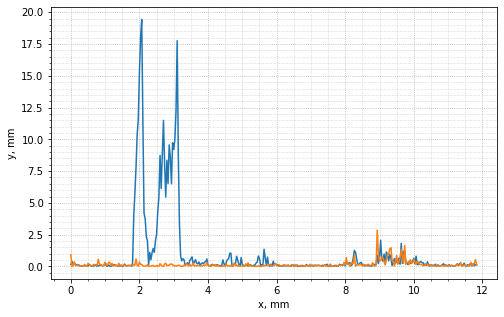

In [128]:
plot_velocities(data, [i for i in range(0, len(data.columns) // 2)])